# Time Series Forecasting

In [6]:
pip install -r requirements.txt

  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## EDA and Preprocessing

In [8]:
# Load the data
data=pd.read_csv('New motor vehicle sales data.csv', parse_dates = True)

# Display the shape of the data
data.shape

(160918, 18)

In [9]:
# Display the first few rows of the data
data.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


### Checked missing value

since no missing value in the main columns we need "REF_DATE" and "Value", no need to drop any missing value.

Comment from Kelechi: The Value column has some null data for some provinces! We will explore if necessary to fill the nulls.

In [10]:
# check for missing values
data.isnull().sum()

REF_DATE                      0
GEO                           0
DGUID                     14362
Vehicle type                  0
Origin of manufacture         0
Sales                         0
Seasonal adjustment           0
UOM                           0
UOM_ID                        0
SCALAR_FACTOR                 0
SCALAR_ID                     0
VECTOR                        0
COORDINATE                    0
VALUE                     18441
STATUS                   142477
SYMBOL                   160918
TERMINATED               155134
DECIMALS                      0
dtype: int64

### Check duplicates

In [11]:
# Check for duplicates
data.duplicated().sum()

0

### Make Year and Month

In [12]:
data['REF_DATE'] = pd.to_datetime(data['REF_DATE'])
# data['REF_DATE'] = data['REF_DATE'].dt.strftime('%Y-%m')
data.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


### Deal with aggregated data

We found that in the dataset, there is aggregated 
1. GEO: national data and provincial data.
2. Vehicle type: Passenger, Truck, and Total New
3. Origin of manufacture: "Japen", "North America", "Other Countries", "Total, country of manufacture", "Total, overseas"


In [24]:
# Display the unique value within each columns
data.nunique()

REF_DATE                   929
GEO                         11
DGUID                       10
Vehicle type                 3
Origin of manufacture        5
Sales                        2
Seasonal adjustment          2
UOM                          2
UOM_ID                       2
SCALAR_FACTOR                2
SCALAR_ID                    2
VECTOR                     257
COORDINATE                 257
VALUE                    63879
STATUS                       1
SYMBOL                       0
TERMINATED                   1
DECIMALS                     1
dtype: int64

#### Deal with aggregated GEO

In [25]:
# Display the  unique values in the 'GEO' column
data['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia and the Territories'],
      dtype=object)

In [26]:
# Split the data with 'GEO="Canada"'
data_canada=data[data['GEO']=='Canada']

# Display the shape of the data
data_canada.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


In [27]:
# filter data_canada store Sales = Units, Seasonal adjustment	= Unadjusted, Vehicle type	="Total, new motor vehicles", Origin of manufacture = "Total, new motor vehicles"
data_canada=data_canada[(data_canada['Sales']=='Units') & (data_canada['Seasonal adjustment']=='Unadjusted') & (data_canada['Vehicle type']=='Total, new motor vehicles') & (data_canada['Origin of manufacture']=='Total, country of manufacture')]

In [28]:
# Display the shape of the data
data_canada.shape

(929, 18)

In [29]:
#Split for provincial data 'GEO' not equal to "Canada"
data_provincial=data[data['GEO']!='Canada']

#Display the unique values in the 'GEO' column to confirm that the rows with 'GEO="Canada" have been removed
data_provincial['GEO'].unique()

#Display the shape of the data
data_provincial.shape

(141268, 18)

In [30]:
# Display the first few rows of the data
data_provincial.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
19650,1968-01-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,754.0,NaN,NaN,NaN,0
19651,1968-02-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,895.0,NaN,NaN,NaN,0
19652,1968-03-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,1569.0,NaN,NaN,NaN,0
19653,1968-04-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,1390.0,NaN,NaN,NaN,0
19654,1968-05-01,Newfoundland and Labrador,2016A000210,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169996,2.1.1.1.1,1567.0,NaN,NaN,NaN,0


In [31]:
# filter data_provincial store Sales = Units, Seasonal adjustment	= Unadjusted, Vehicle type	=Total, new motor vehicles
data_provincial=data_provincial[(data_provincial['Sales']=='Units') & (data_provincial['Seasonal adjustment']=='Unadjusted') & (data_provincial['Vehicle type']=='Total, new motor vehicles') & (data_provincial['Origin of manufacture']=='Total, country of manufacture')]

In [32]:
#Display the shape of the data
data_provincial.shape

(6740, 18)

### Plot

#### National Level

In [33]:
# sort the data by 'REF_DATE' in ascending order
data_canada.head()

,REF_DATE,GEO,DGUID,Vehicle type,Origin of manufacture,Sales,Seasonal adjustment,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1946-10-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,11462.0,NaN,NaN,NaN,0
1,1946-11-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13497.0,NaN,NaN,NaN,0
2,1946-12-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,12689.0,NaN,NaN,NaN,0
3,1947-01-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,13977.0,NaN,NaN,NaN,0
4,1947-02-01,Canada,2016A000011124,"Total, new motor vehicles","Total, country of manufacture",Units,Unadjusted,Units,300,units,0,v42169911,1.1.1.1.1,15806.0,NaN,NaN,NaN,0


In [34]:
# List categories in categorical columns
categorical_columns = ['GEO', 'Vehicle type', 'Origin of manufacture', 'Sales', 'Seasonal adjustment', 'UOM', 'SCALAR_FACTOR']
categories = {col: data_canada[col].unique() for col in categorical_columns}

# Display the categories
for col, unique_values in categories.items():
    print(f"{col}: {unique_values}")

GEO: ['Canada']
Vehicle type: ['Total, new motor vehicles']
Origin of manufacture: ['Total, country of manufacture']
Sales: ['Units']
Seasonal adjustment: ['Unadjusted']
UOM: ['Units']
SCALAR_FACTOR: ['units']


## Forecasting

In [35]:
# 将 REF_DATE 转换为日期格式
data_canada['REF_DATE'] = pd.to_datetime(data_canada['REF_DATE'], format='%Y-%m')
# 按日期排序
data_canada = data_canada.sort_values('REF_DATE')
# 提取日期和销售量作为时间序列数据
ts_data_canada = data_canada[['REF_DATE', 'VALUE']].set_index('REF_DATE')

In [36]:
# 检查缺失值
print(ts_data_canada.isnull().sum())
# 如果有缺失值，可以用插值法填充
# ts_data_canada['VALUE'] = ts_data_canada['VALUE'].interpolate(method='linear')

VALUE    0
dtype: int64


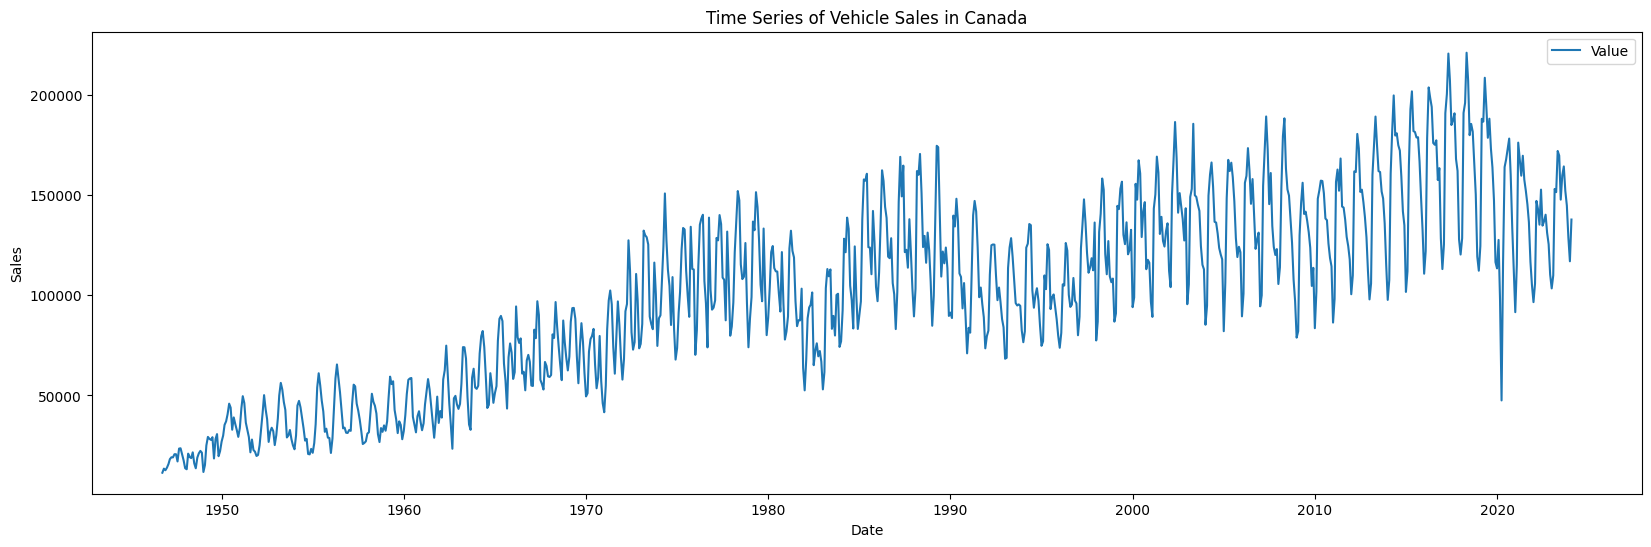

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))
plt.plot(ts_data_canada.index, ts_data_canada['VALUE'], label='Value')
plt.title('Time Series of Vehicle Sales in Canada')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

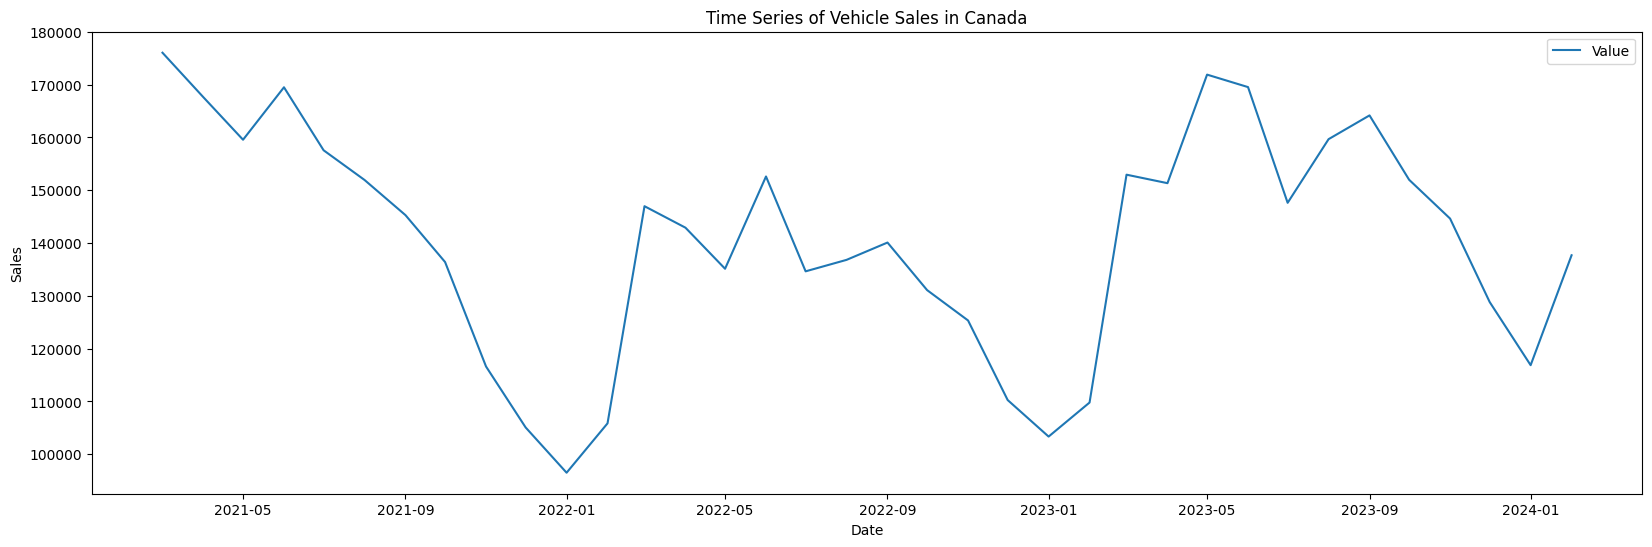

In [43]:
ts_data_last_36_mths = ts_data_canada.tail(36)

plt.figure(figsize=(20, 6))
plt.plot(ts_data_last_36_mths.index, ts_data_last_36_mths['VALUE'], label='Value')
plt.title('Time Series of Vehicle Sales in Canada')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [44]:
ts_data_last_36_mths.head()

,VALUE
REF_DATE,
2021-03-01,176036.0
2021-04-01,167601.0
2021-05-01,159559.0
2021-06-01,169492.0
2021-07-01,157566.0


### Method: ARIMA

WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.


WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.


WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.


WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning:

Too few observations to estimate starting

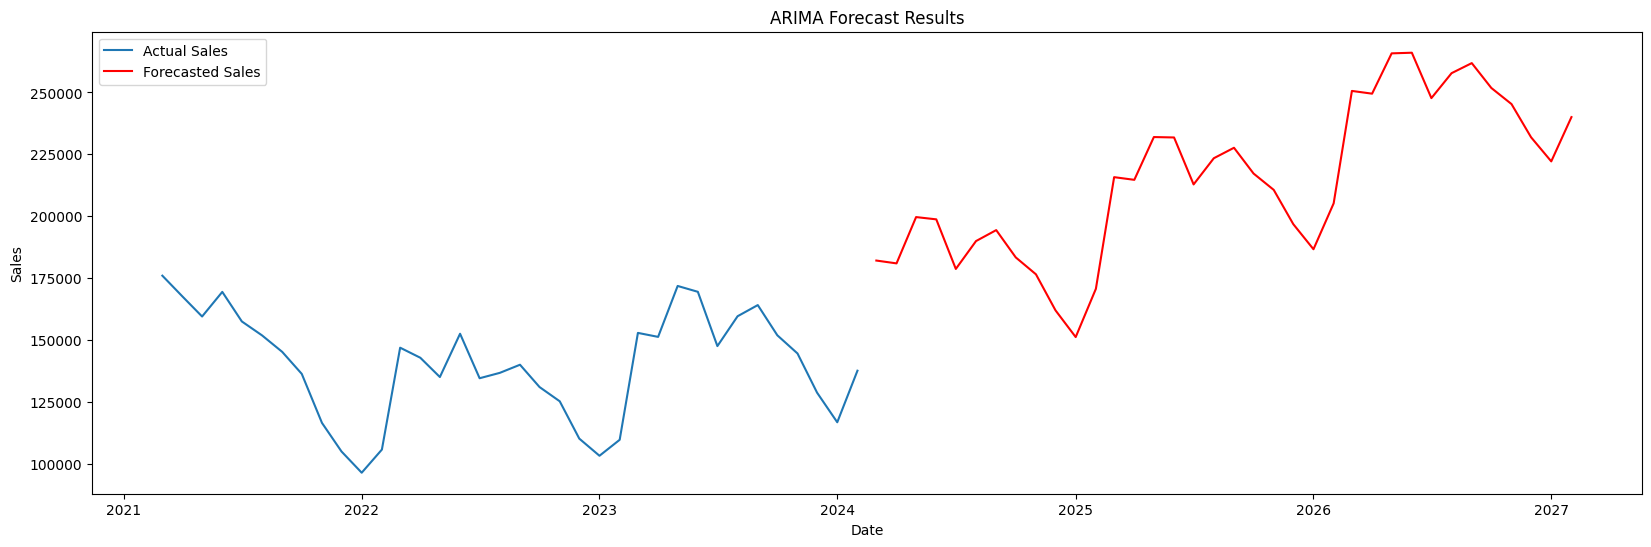

In [45]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# 拟合 ARIMA 模型 (p, d, q) 参数需要通过 ACF/PACF 图或自动调参确定
model = ARIMA(ts_data_last_36_mths['VALUE'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_result = model.fit()

# 预测未来 36 个月
forecast_arima = arima_result.forecast(steps=36)

# 可视化预测结果
plt.figure(figsize=(20, 6))
plt.plot(ts_data_last_36_mths.index, ts_data_last_36_mths['VALUE'], label='Actual Sales')
plt.plot(forecast_arima.index, forecast_arima, label='Forecasted Sales', color='red')
plt.title('ARIMA Forecast Results')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


### Method: NeuralProphet

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.222]% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is d

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (5) is too small than the required number                     for the learning rate finder (203). The results might not be optimal.


Finding best initial lr:   0%|          | 0/203 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/pytorch_lightning/utilities/data.py:79: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to [97.222]% of the data.
WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_u

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
ERROR - (NP.plotly.plot) - plotly-resampler is not installed. Please install it to use the resampler.
WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:98: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /Users/kellyliu/Documents/GitHub/time_series_forecasting/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, c

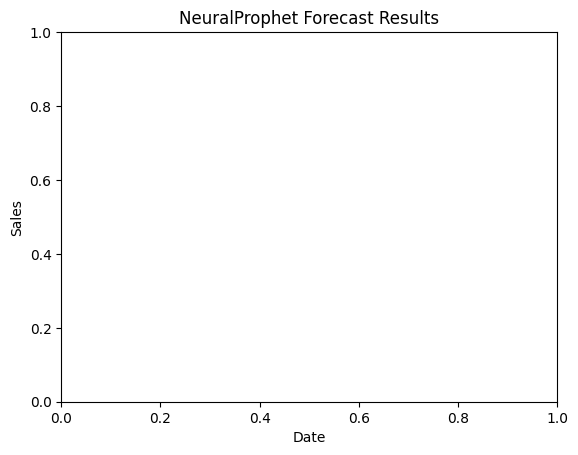

In [46]:
from neuralprophet import NeuralProphet

# 准备数据
np_data = ts_data_last_36_mths.reset_index().rename(columns={'REF_DATE': 'ds', 'VALUE': 'y'})

# 拟合 NeuralProphet 模型
model = NeuralProphet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
metrics = model.fit(np_data, freq='MS')

# 预测未来 36 个月
future = model.make_future_dataframe(np_data, periods=36)
forecast_np = model.predict(future)

# 可视化结果
fig = model.plot(forecast_np)
plt.title('NeuralProphet Forecast Results')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [49]:
forecast_np.head()

,ds,y,yhat1,trend,season_yearly
0,2024-03-01,None,177042.31250,160004.625000,17037.687500
1,2024-04-01,None,174383.37500,161571.640625,12811.744141
2,2024-05-01,None,180223.75000,163088.125000,17135.632812
3,2024-06-01,None,188801.62500,164655.125000,24146.484375
4,2024-07-01,None,171398.28125,166171.593750,5226.680176
